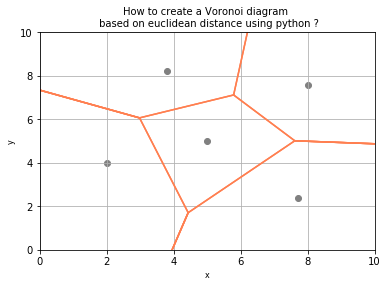

In [10]:
import matplotlib.pyplot as plt
import numpy as np 
import math

x_min, x_max = 0.0, 10.0
y_min, y_max = 0.0, 10.0

x_pts = [2.0,3.8,5.0,7.7,8.0]
y_pts = [4.0,8.2,5.0,2.4,7.6]

plt.scatter(x_pts,y_pts, color='gray')

x = np.linspace(0, 10, 100)

for idx in range(len(x_pts)):

	voronoi_segment_list = []

	#----------------------------------------------------------------------------------------#
	# Step 1: find nearest point

	if idx < len(x_pts)-1 :
		jdx_min = idx + 1
	else:
		jdx_min = idx - 1

	d_min = math.sqrt( (x_pts[idx]-x_pts[jdx_min])**2 + (y_pts[idx]-y_pts[jdx_min])**2 )

	for jdx,pts in enumerate(x_pts):
		if jdx != idx:
			d = math.sqrt( (x_pts[idx]-x_pts[jdx])**2 + (y_pts[idx]-y_pts[jdx])**2 )
			if d < d_min:
				d_min = d
				jdx_min = jdx
				
	#----------------------------------------------------------------------------------------#
	# Step 2: find all perpendicular lines

	perp_line_list = []

	for jdx,pts in enumerate(x_pts):
		if jdx != idx:
		
			x_middle = 0.5 * ( x_pts[idx] + x_pts[jdx] )
			y_middle = 0.5 * ( y_pts[idx] + y_pts[jdx] )
		
			slope = ( y_pts[jdx] - y_pts[idx] ) / ( x_pts[jdx] - x_pts[idx] )
		
			perp_slope = -1.0 / slope 
			perp_intercept = y_middle - perp_slope * x_middle

			if jdx == jdx_min: first_perp_line_idx = len(perp_line_list)	
		
			perp_line_list.append((perp_slope,perp_intercept,x_middle,y_middle))
		
			#y = perp_slope * x + perp_intercept

			#plt.plot(x,y, color='gray', linestyle='--')

	#----------------------------------------------------------------------------------------#
	# Step 3: find the first voronoi segment

	x_middle_0 = 0.5 * ( x_pts[idx] + x_pts[jdx_min] )
	y_middle_0 = 0.5 * ( y_pts[idx] + y_pts[jdx_min] )

	slope_0 = perp_line_list[first_perp_line_idx][0]
	intercept_0 = perp_line_list[first_perp_line_idx][1]

	#y = slope_0 * x + intercept_0

	#plt.plot(x,y, color='red', linestyle='--')

	intersection_list = []

	intersection_list.append((x_min,slope_0 * x_min + intercept_0,slope_0,intercept_0))

	intersection_list.append((x_max,slope_0 * x_max + intercept_0,slope_0,intercept_0))

	for line in perp_line_list:

		slope = line[0]
		intercept = line[1]

		if slope != slope_0 and intercept != intercept_0:
	
			intersection_x = (intercept - intercept_0) / ( slope_0 - slope )

			intersection_list.append((intersection_x,slope * intersection_x + intercept,slope,intercept))

	intersection_list.sort(key=lambda x: x[0])

	#print(intersection_list)
	#print(' ')

	line_0_list = []

	for i in range(len(intersection_list)-1):
	
		if x_middle_0>intersection_list[i][0] and x_middle_0<intersection_list[i+1][0]:
		
			voronoi_segment_list.append((
			intersection_list[i][0],
			intersection_list[i][1],
			intersection_list[i+1][0],
			intersection_list[i+1][1],
			slope_0,
			intercept_0))
		
			line_0_list.append((
			intersection_list[i][0],
			intersection_list[i][1],
			intersection_list[i][2],
			intersection_list[i][3],))

			line_0_list.append((
			intersection_list[i+1][0],
			intersection_list[i+1][1],
			intersection_list[i+1][2],
			intersection_list[i+1][3],))

	#print('voronoi_segment_list',voronoi_segment_list)
	#print(' ')

	#print('line_0_list',line_0_list)
	#print(' ')

	#----------------------------------------------------------------------------------------#
	# Step 4: find all voronoi segments

	while line_0_list:

		new_line_0_list = []
		new_voronoi_segment_list = []
	
		for line_0 in line_0_list:

			slope_0 = line_0[2]
			intercept_0 = line_0[3]
		
			x_0 = line_0[0]
			y_0 = line_0[1]
		
			#print('slope_0,intercept_0',slope_0,intercept_0,x_0,y_0)
			#print(' ')
		
			#y = slope_0 * x + intercept_0

			#plt.plot(x,y, color='yellow', linestyle='--')

			intersection_list = []
		
			fx_min = slope_0 * x_min + intercept_0
			d = math.sqrt( (x_min-x_0)**2 + (fx_min-y_0)**2)
			intersection_list.append((x_min,fx_min,d,slope_0,intercept_0))

			fx_min = slope_0 * x_max + intercept_0
			d = math.sqrt( (x_min-x_0)**2 + (fx_min-y_0)**2)
			intersection_list.append((x_max,fx_min,d,slope_0,intercept_0))

			for line in perp_line_list:

				slope = line[0]
				intercept = line[1]
			
				if slope != slope_0 and intercept != intercept_0:
	
					intersection_x = (intercept - intercept_0) / ( slope_0 - slope )
				
					fx_min = slope * intersection_x + intercept
					d = math.sqrt( (intersection_x-x_0)**2 + (fx_min-y_0)**2)
				
					intersection_list.append((intersection_x,fx_min,d,slope,intercept))

			intersection_list.sort(key=lambda x: x[0])

			#print('intersection_list',intersection_list)
			#print(' ')	
		
			intersection_list_filtered = []
		
			for i,intersection in enumerate(intersection_list):
		
				#if intersection[2] != 0.0: 
				if abs(intersection[2]) > 0.000000001: 
			
					for voronoi_segment in voronoi_segment_list:
				
						a = y_pts[idx] - ( voronoi_segment[4] * x_pts[idx]  + voronoi_segment[5] )
						b = intersection[1] - ( voronoi_segment[4] * intersection[0]  + voronoi_segment[5] )
						
						if a > 0.0 and b > 0.0: intersection_list_filtered.append(intersection)
						if a < 0.0 and b < 0.0: intersection_list_filtered.append(intersection)

		
			intersection_list_filtered.sort(key=lambda x: x[2])
		
			#print('intersection_list filtered',intersection_list_filtered)
			#print(' ')	
			#print('----------------')		
		
		
			intersection_slope = intersection_list_filtered[0][3]
			intersection_intercept = intersection_list_filtered[0][4]

			cond = True		
			for voronoi_segment in voronoi_segment_list:		
				if intersection_slope == voronoi_segment[4] and intersection_intercept == voronoi_segment[5]:
					cond = False
		
			for new_line_0 in new_line_0_list:		
				if intersection_slope == new_line_0[2] and intersection_intercept == new_line_0[3]:
					cond = False
		
			if cond:
				new_line_0_list.append((
				intersection_list_filtered[0][0],
				intersection_list_filtered[0][1],
				intersection_list_filtered[0][3],
				intersection_list_filtered[0][4]))
		
			new_voronoi_segment_list.append((
			x_0,
			y_0,
			intersection_list_filtered[0][0],
			intersection_list_filtered[0][1],
			slope_0,
			intercept_0))

		for new_voronoi_segment in new_voronoi_segment_list:
			voronoi_segment_list.append(new_voronoi_segment)
	
		#print('new_line_0_list',new_line_0_list)
		#print(' ')		

		line_0_list = new_line_0_list

	#----------------------------------------------------------------------------------------#

	#print(voronoi_segment_list,len(voronoi_segment_list))

	for voronoi_segment in voronoi_segment_list:
	
		voronoi_segment_x = [voronoi_segment[0],voronoi_segment[2]]
		voronoi_segment_y = [voronoi_segment[1],voronoi_segment[3]]

		plt.plot(voronoi_segment_x, voronoi_segment_y, color='coral', linestyle='-')

#----------------------------------------------------------------------------------------#

plt.title("How to create a Voronoi diagram \n based on euclidean distance using python ?", fontsize=10)
plt.xlabel('x',fontsize=8)
plt.ylabel('y',fontsize=8)

plt.xlim(0,10)
plt.ylim(0,10)

plt.grid()

plt.savefig("voronoi_01.png")
#plt.show()